<center>
  <h1> CSCI-P556 Applied Machine Learning</h1>
  <h1> CSCI-P556</h1>
  <h1> Assignment 0 </h1>
</center>
---





## Instructions
1. Please read the questions carefully and give your responses in the correct positions.
2. Do not change the contents of the notebook except when adding your reponses or where it is explicitly mentioned.
3. Whenever you are asked to write a function and the argument names are mentioned in the question, you have to assume that while testing these arguments will be defined elsewhere in the notebook. 
3. You are allowed to define test arguments of the same name in the respective code block in order to test your functions.
4. If you have been asked to print or plot something, you are supposed to print/plot it and not just provide a function.
5. You should save your notebook along with the outputs and submit it



In [1]:
# For this assignment you'll need to import the following libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 (5 points)

Consider a 4x4 numpy array as shown
$$\begin{bmatrix}1 & 2 & 3 & 4\\5 & 6 & 7 & 8\\9 & 10 & 11 & 12\\13 & 14 & 15 & 16\end{bmatrix}$$

1. Create the above matrix with one line of code and name it $a$. Print the matrix.
2. Write code to select its principal diagonal in another line. Store this diagonal in $d$. Print $d$
3. Write code to select 4 elements in the center of the array (in this case, 6, 7, 10, 11) and store it in $c$. Print $c$.
4. Replace the diagonal elements by their squares and print the new $a$.

#### Restrictions: 
To make the problem interesting, you are **NOT** allowed to:
- Create the matrix using `a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])`
- Use the diagonal() method that is available in numpy

In [9]:
### YOUR CODE FOR Q1 GOES HERE

#ONE line matrix creation using list comprehension
a = [[i for i in range(1,17)][j*4:j*4+4] for j in range(4)]
print("The matrix is : ", a)

#creating diagnol elements 
d = [a[i][i] for i in range(len(a))]
print("The diagnol elements: ",d)

#center elements
c=[a[1][1],a[1][2],a[2][1],a[2][2]]
print("Elements in center: ",c)


#Replacing diagnol elements with squares
for i in range(len(a)):
    a[i][i] = a[i][i]**2
#new a
print("The new a matrix: ",a)

The matrix is :  [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
The diagnol elements:  [1, 6, 11, 16]
Elements in center:  [6, 7, 10, 11]
The new a matrix:  [[1, 2, 3, 4], [5, 36, 7, 8], [9, 10, 121, 12], [13, 14, 15, 256]]


## Question 2 (3 points)

Let us make the above question a bit more interesting. What if you didn't know the size of the array $a$. Let us assume it is $n \times n$.
1. Write code to print the diagonal elements of $a$.
2. For any $k$, write code to print the elements which lie in the center $k \times k$ region of the $a$.

#### Note:
- Same restrictions apply as above
- You should assume that only the matrix $a$ and the integer $k$ have been defined elsewhere in the notebook are available to you. Your code will be tested on a number of test cases and should pass them all successfully


In [11]:
a = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
print(a)
# please change your input matrix here.

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]


In [12]:
### YOUR CODE FOR Q2 GOES HERE

# printing both the diagnol1 elements

print("The diagnol elements are: ",[a[i][i] for i in range(len(a))])

# printing center K*K elements accordingly
"""Note: K value must be odd for odd matrix and even for even matrix"""

k=4 # change value accordingly

elements=[]
if k%2 !=0 :
    center=a[(len(a)-1)//2][(len(a)-1)//2]
    topleft=a[(len(a)-1)//2-k//2][(len(a)-1)//2-k//2]
    for i in range(k):
        for j in range(k):
            elements.append(a[(len(a)-1)//2-k//2+i][(len(a)-1)//2-k//2+j])
else:
    center=a[(len(a))//2][(len(a))//2]
    topleft=a[(len(a))//2-k//2][(len(a))//2-k//2]
    for i in range(k):
        for j in range(k):
            elements.append(a[(len(a))//2-k//2+i][(len(a))//2-k//2+j])
print(elements)




The diagnol elements are:  [1, 6, 11, 16]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


## Question 3 (6 points)

In this question, we will look at the speedup that vectorization brings to the table. The dot product of two vectors $\overline{a}=[a_1, a_2, \ldots, a_n]$ and $\overline{b}=[b_1, b_2, \ldots, b_n]$  is defined as:
$$ \overline{a} \cdot \overline{b} = \sum_{i=1}^n a_i b_i$$

1. Write a function to calculate the dot product of two lists using `for` loops.
2. Use numpy's functionality to do the same.
3. Find out computation times for arrays of sizes (10,000, 20,0000, ..., 100,000) and plot the two sets of times in a line plot.

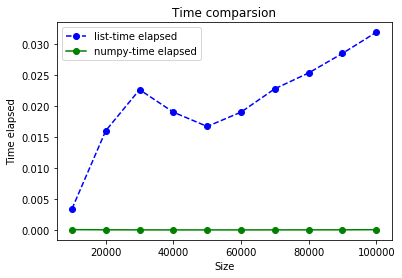

In [14]:
## Boilerplate code for Question 3
import timeit
gen = np.random.RandomState(seed=42)

def time_function(f, *args):
  """
  This is a simple utility function to measure the runtime 
  of a python function. It will return the result of the function
  execution and the time taken to run that function. Any arguments 
  required by the function to run should be passed after the function name.
  INPUT: function name, arg1, arg2, ...
  OUTPUT: Output of the passed function, time taken to run it
  """   
  start = timeit.default_timer()
  ret = f(*args)
  f(*args)
  f(*args)
  stop = timeit.default_timer()
  return ret, (stop-start)/3

def random_int_array(array_size):
  # The low and high arguments below are used to specify the range of random
  # values that will be used to generate the random integers.
  return np.random.randint(low=0, high=1000000, size=array_size)

def calculate_dot_product(a, b):
    dot_product=0
    for i in range(len(a)):
        dot_product=dot_product+a[i]*b[i]
    return(dot_product)


sizes = (10000 * i for i in range(1, 11))
list_time_elapsed=[]
numpy_time_elapsed=[]
size_of_array=[]
for size in sizes:
  a = gen.rand(size)
  b = gen.rand(size)
  
  dp1 = time_function(calculate_dot_product,a,b) # Modify these two lines to calculate output and runtime using 
  dp2 = time_function(np.dot,a,b)
  assert(round(dp1[0],8) == round(dp2[0],8)) # rounding off to 8 digits to make dp1 and dp2 equal
  #print(dp1,dp2)
  list_time_elapsed.append(dp1[1])
  numpy_time_elapsed.append(dp2[1])
  size_of_array.append(size)
plt.plot(size_of_array,list_time_elapsed,linestyle="--",marker="o",color="blue",label="list-time elapsed")
plt.plot(size_of_array,numpy_time_elapsed,color="green",marker="o",label="numpy-time elapsed")
plt.legend(loc="best",ncol=1)
plt.xlabel("Size")
plt.ylabel("Time elapsed")
plt.title("Time comparsion")
plt.show()
  
  
  ### Write code to store the values
  
# Write code to plot the values

## Question 4 (4 points)

We have provided code which loads an interesting dataset about breast cancer in a pandas dataframe variable called `data`. We also provide 5 samples of the dataset
The breast cancer dataset is loaded into a dataframe called "data" and the "labels" are stored as a dataframe as well.  

Please bear in mind that you cannot actually look at the entire dataset in the notebook since it has many columns. If you want to look at the entire dataframe/dataset, use data.to_csv() to write the data frame to a csv file. For the questions given, you don't actually need to look at the entire dataset. A sample of the data shown in the next block is enough.

Write code to:

1.  Get the total number of samples whose "mean perimeter" is greater than 130.
2.  Group the "worst area" column based on the "labels" and get the maximum "worst area" for each group. In this case, there will be 2 groups since we have only 2 labels.
3.  Get the column which has the minimum sum and subtract each value of that column by its mean. i.e., (column value - mean of the column)

In [16]:
#Starter code. Do not make changes to this code block.

from sklearn.datasets import load_breast_cancer
raw_data = load_breast_cancer()

data = pd.DataFrame(raw_data["data"], columns= raw_data["feature_names"])
labels = pd.DataFrame(raw_data["target"], columns = ["target"])
data.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Code for Question 4.1
count=0
for i in data["mean perimeter"]:
    if i > 130:
        count+=1
print(count)


51


In [18]:
# Code for Question 4.2
#print(labels["target"])
data["target"]=labels["target"]
label_zero=[]
label_one=[]
for i in range(len(data["target"])):
    if data["target"][i]==0:
        label_zero.append(data["worst area"][i])
    else:
        label_one.append(data["worst area"][i])
print("Group 0 max",max(label_zero))
print("Group 1 max",max(label_one))
   
    

    
    

Group 0 max 4254.0
Group 1 max 1210.0


In [19]:
# Code for Question 4.3
sums={}
for column in data:
    sums[column]=data[column].sum()
for i in sums:
    if sums[i]== min(sums.values()):        
        data[i]=data[i]-data[i].mean()
        print(data[i])
        break

    

0      0.002398
1     -0.000263
2      0.000776
3      0.005413
4      0.001320
5      0.001287
6     -0.001616
7      0.001617
8     -0.000046
9      0.006285
10    -0.000753
11     0.000349
12     0.009045
13    -0.000793
14     0.004298
15     0.001671
16    -0.001710
17     0.000347
18    -0.001798
19    -0.001495
20    -0.001370
21    -0.000827
22     0.000599
23    -0.001808
24    -0.000994
25     0.003649
26    -0.000084
27     0.000422
28    -0.000828
29    -0.000053
         ...   
539    0.003756
540    0.001717
541    0.002316
542   -0.001169
543   -0.002452
544   -0.000196
545   -0.001212
546   -0.001189
547    0.002095
548    0.000359
549   -0.000818
550   -0.001567
551    0.000928
552   -0.002069
553    0.000828
554   -0.000994
555    0.001143
556   -0.001517
557   -0.000471
558    0.000611
559    0.000943
560    0.001509
561   -0.002022
562    0.002347
563    0.002418
564    0.000444
565   -0.001297
566    0.000097
567    0.002390
568   -0.001012
Name: fractal dimension 

## Question 5 (7 points)

### Part A

Write a function which takes three inputs and produces a plot using matplotlib. The first two inputs are lists. Each list contains a certain number of tuples. Each tuple in turn contains the $x$ and $y$ co-ordinates of a point. The third input is a stand-alone tuple containing the co-efficients $(a, b, c)$ of a line represented by $ax + by + c = 0$.

The function should plot the first set of points with a red '+' and the second set of points with a blue 'o'. The function should also plot the line in green color. Give a suitable legend and name the axes. If the final tuple isn't provided, the function should gracefully avoid printing the line instead of throwing an error. Feel feel to modify the function definition accordingly.


((-1, 2, 2),)


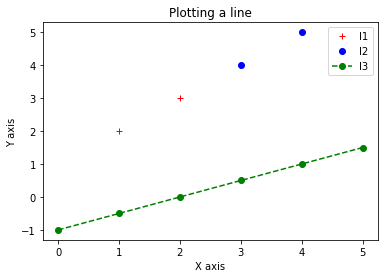

In [6]:
def plotLineAndPoints(l1, l2,*l3):
    l1_x1=[]
    l1_y1=[]
    l2_x2=[]
    l2_y2=[]
    x_ord=[0,1,2,3,4,5]
    y_ord=[]
    
    for i in l1:
        l1_x1.append(i[0])
        l1_y1.append(i[1])
    for i in l2:
        l2_x2.append(i[0])
        l2_y2.append(i[1])
    
        
    if l3!= ():
        a,b,c=l3[0]
        for i in x_ord:
            x=i            
            temp=-((c/b)+(a/b)*x)
            y_ord.append(temp)
    
        
    

    plt.plot(l1_x1,l1_y1,'r+',label="l1")
    plt.plot(l2_x2,l2_y2,"bo",label="l2")
    print(l3)
    if len(l3)!=0:
        
        plt.plot(x_ord,y_ord,color="green",linestyle="--",marker="o",label="l3")
        
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.title("Plotting a line")
    plt.legend(loc="best",ncol=1)
        
  

## Sample Test Cases (We will have many more)
plotLineAndPoints([(1, 2), (2, 3)], [(3, 4), (4, 5)], (-1, 2, 2))
#plotLineAndPoints([(1, 2), (2, 3)], [(3, 4), (4, 5)])


### Part B

Euclidean distance between two points is defined as by equation (1) on this [Wikipedia page](https://en.wikipedia.org/wiki/Euclidean_distance).

  1. Your first task is to write down that code using Markdown math in this cell. It should contain both lines of equation (1)
$d(p,q)=d(q,p)=\sqrt{(q_1-p_1)^2+(q_2-p_2)^2+(q_3-p_3)^2+...+(q_n-p_n)^2}$ <br>
$\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$$=\sum_{i=1}^{n}\sqrt{(q_i-p_i)^2}$
  2. Given a point $(x_1,y_1)$ and a radius $r_1$, randomly generate 10 points which lie within the given radius of the given point. The radius is calculated using Euclidean distance. Store them in list $l_1$.
  3. Generate another list $l_2$ for a new point $(x_2, y_2)$ and radius $r_2$
  4. Use the function written in part A to plot the above sets of points.

()


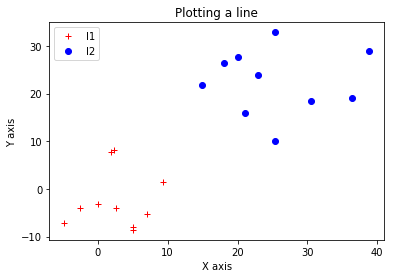

In [13]:
x1, y1 = 0, 0
r1 = 10
x2, y2 = 25, 25
r2 = 15
l1=[]
l2=[]
# equation of circle : (x-x1)^2+(y-y1)^2=(radius)^2
count=0
while(count<10):
    
    x=np.random.uniform(x1-r1,x1+r1,1)
    y=np.random.uniform(y1-r1,y1+r1,1)
    if(x[0]-x1)**2+(y[0]-y1)**2 < (r1**2):
        count+=1
        temp=(x[0],y[0])
        l1.append(temp)
count1=0       
while(count1<10):
    
    p=np.random.uniform(x2-r2,x2+r2,1)
    q=np.random.uniform(y2-r2,y2+r2,1)
    if(p[0]-x2)**2+(q[0]-y2)**2<(r2**2):
        count1+=1
        temp2=(p[0],q[0])
        l2.append(temp2)

plotLineAndPoints(l1,l2)